csc536 Data Viz.

SIT@KMUTT

2023

- Reference:Python Data Analytics by Fabio Nelli, APress, 2015
    
- Some more basics of Python's Numpy and Pandas

In [ ]:

# The three phases of data manipulation are
#      Data preparation
#      Data transformation
#      Data aggregation

import numpy as np
import pandas as pd

df =  pd.DataFrame(np.arange(9).reshape(3,3),
    index=['white','black','red'],
    columns=['ball','pen','pencil'])
df

,ball,pen,pencil
white,0,1,2
black,3,4,5
red,6,7,8


In [ ]:
# data preparation: merging

# Note: merged only those in common (overlap)
fr1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],
    'price': [12.33,11.44,33.21,13.23,33.62]})
print(fr1)
print()

fr2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],
    'color': ['white','red','red','black']})
print(fr2)
print()

pd.merge(fr1,fr2)

        id  price
0     ball  12.33
1   pencil  11.44
2      pen  33.21
3      mug  13.23
4  ashtray  33.62

       id  color
0  pencil  white
1  pencil    red
2    ball    red
3     pen  black



,id,price,color
0,ball,12.33,red
1,pencil,11.44,white
2,pencil,11.44,red
3,pen,33.21,black


In [ ]:
# in most cases you need to decide which is the column on which to base the merging

fm1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],
    'color': ['white','red','red','black','green'],
    'brand': ['OMG','ABC','ABC','POD','POD']})
print(fm1)
print()

fm2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],
    'brand': ['OMG','POD','ABC','POD']})
print(fm2)
print()

# specifying which column to be jointly used when merging
print("Inner join: merged with respect to 'id' (intersection)")
pd.merge(fm1,fm2, on='brand')  # by default, this is an inner join, or intersection


        id  color brand
0     ball  white   OMG
1   pencil    red   ABC
2      pen    red   ABC
3      mug  black   POD
4  ashtray  green   POD

       id brand
0  pencil   OMG
1  pencil   POD
2    ball   ABC
3     pen   POD

Inner join: merged with respect to 'id' (intersection)


,id_x,color,brand,id_y
0,ball,white,OMG,pencil
1,pencil,red,ABC,ball
2,pen,red,ABC,ball
3,mug,black,POD,pencil
4,mug,black,POD,pen
5,ashtray,green,POD,pencil
6,ashtray,green,POD,pen


In [ ]:
# another way of joining.
# try this outer join, or union
print("Outer join (union)\n")
pd.merge(fm1,fm2, on='id', how='outer')

Outer join (union)



,id,color,brand_x,brand_y
0,ball,white,OMG,ABC
1,pencil,red,ABC,OMG
2,pencil,red,ABC,POD
3,pen,red,ABC,POD
4,mug,black,POD,NaN
5,ashtray,green,POD,NaN


In [ ]:
# concatenate

fm1 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],
    'brand': ['OMG','POD','ABC','POD']})
print(fm1)
print()

fm2 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[4,5,6], 
    columns=['A','B','C'])
print(fm2)
print()

print("Concatenated:\n")
pd.concat([fm1,fm2], sort=False)  # concatenated along the default axis = 0 (by index/row)


       id brand
0  pencil   OMG
1  pencil   POD
2    ball   ABC
3     pen   POD

          A         B         C
4  0.439841  0.705758  0.373308
5  0.683395  0.126915  0.198143
6  0.195246  0.697898  0.845741

Concatenated:



,id,brand,A,B,C
0,pencil,OMG,NaN,NaN,NaN
1,pencil,POD,NaN,NaN,NaN
2,ball,ABC,NaN,NaN,NaN
3,pen,POD,NaN,NaN,NaN
4,NaN,NaN,0.439841,0.705758,0.373308
5,NaN,NaN,0.683395,0.126915,0.198143
6,NaN,NaN,0.195246,0.697898,0.845741


In [ ]:
# Concatenation by column; turned out to be the same as by row here.

pd.concat([fm1,fm2], sort=False, axis=1) # column wise

,id,brand,A,B,C
0,pencil,OMG,NaN,NaN,NaN
1,pencil,POD,NaN,NaN,NaN
2,ball,ABC,NaN,NaN,NaN
3,pen,POD,NaN,NaN,NaN
4,NaN,NaN,0.439841,0.705758,0.373308
5,NaN,NaN,0.683395,0.126915,0.198143
6,NaN,NaN,0.195246,0.697898,0.845741


In [ ]:
print(df)
print()

# stack() will get the pivoting of the columns in rows (row by row), thus producing a Series
st = df.stack()
print(st)
type(st)

       ball  pen  pencil
white     0    1       2
black     3    4       5
red       6    7       8

white  ball      0
       pen       1
       pencil    2
black  ball      3
       pen       4
       pencil    5
red    ball      6
       pen       7
       pencil    8
dtype: int64


pandas.core.series.Series

In [ ]:
# A dataset can be written in two different formats: wide and long.
#     A wide format contains values that do not repeat in the first column. 
#     A long format contains values that do repeat in the first column.

# In long vertical format, every row represents an observation belonging to a particular category.
# On the contrary, in wide format, categorical data is always grouped.

print("long format data:")

lf = pd.DataFrame({ 
    'color':['white','white','white','red','red','red','black','black','black'],
    'item':['ball','pen','mug','ball','pen','mug','ball','pen','mug'],
    'value': np.random.rand(9)})
lf

long format data:


,color,item,value
0,white,ball,0.356644
1,white,pen,0.379383
2,white,mug,0.035386
3,red,ball,0.161599
4,red,pen,0.027197
5,red,mug,0.546981
6,black,ball,0.523803
7,black,pen,0.754971
8,black,mug,0.692899


In [ ]:
# changed to a wide format, using pivot()

# by providing parameters as column(s)
# The wide format is easier to read and interpret as compared to the long format

wf = lf.pivot("color", 'item')
wf

value                    
item       ball       mug       pen
color                              
black  0.523803  0.692899  0.754971
red    0.161599  0.546981  0.027197
white  0.356644  0.035386  0.379383

In [ ]:
# Let's try to remove a column, using del
# Removing a row, using drop()

frm = pd.DataFrame(np.arange(9).reshape(3,3),
    index=['white','black','red'],
    columns=['ball','pen','pencil'])
print(frm)
# delete a column
del frm['pen']
print("\nAfter")
print(frm)
# delete a row
print("\nDeleting a row")
fm =frm.drop('black')
fm

       ball  pen  pencil
white     0    1       2
black     3    4       5
red       6    7       8

After
       ball  pencil
white     0       2
black     3       5
red       6       8

Deleting a row


,ball,pencil
white,0,2
red,6,8


In [ ]:
# Data transformation
# removing duplicated rows
dfr = pd.DataFrame({ 'color': ['white','white','red','red','white'],
    'value': [2,1,3,3,2]})
print(dfr)
print('\nShow the duplicated rows\n')
print(dfr.duplicated())

# to ascertain the duplicated rows
dfr[dfr.duplicated()]

# to delete all duplicated rows
dfr.drop_duplicates()

   color  value
0  white      2
1  white      1
2    red      3
3    red      3
4  white      2

Show the duplicated rows

0    False
1    False
2    False
3     True
4     True
dtype: bool


,color,value
0,white,2
1,white,1
2,red,3


In [ ]:
# replace some values
fra = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
    'color':['white','rosso','verde','black','yellow'],
    'price':[5.56,4.20,1.30,0.56,2.75]})
print(fra)
new_colors = {
    'rosso':'red',
    'verde':'green'
}
fra.replace(new_colors)

      item   color  price
0     ball   white   5.56
1      mug   rosso   4.20
2      pen   verde   1.30
3   pencil   black   0.56
4  ashtray  yellow   2.75


,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


In [ ]:
# replace a NaN with, say, 0
sr = pd.Series([1,3,np.nan,4,6,np.nan,3])
print(sr)
print('\nReplace NaN with zero')
sr.replace(np.nan,0)

0    1.0
1    3.0
2    NaN
3    4.0
4    6.0
5    NaN
6    3.0
dtype: float64

Replace NaN with zero


0    1.0
1    3.0
2    0.0
3    4.0
4    6.0
5    0.0
6    3.0
dtype: float64

In [ ]:
# adding some values via mapping
frm = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
                    'color':['white','red','green','black','yellow']})
print(frm)

# you also have a price list as follows
price = {
    'ball' : 5.56,
    'mug' : 4.20,
    'bottle' : 1.30,
    'scissors' : 3.41,
    'pen' : 1.30,
    'pencil' : 0.56,
    'ashtray' : 2.75
}

print(price)

frm['price'] = frm['item'].map(price)
frm

      item   color
0     ball   white
1      mug     red
2      pen   green
3   pencil   black
4  ashtray  yellow
{'ball': 5.56, 'mug': 4.2, 'bottle': 1.3, 'scissors': 3.41, 'pen': 1.3, 'pencil': 0.56, 'ashtray': 2.75}


,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


In [ ]:
# rename the index
print(frm)
print()

reindex = {
    0: 'first',
    1: 'second',
    2: 'third',
    3: 'fourth',
    4: 'fifth'
}

frm1 = frm.rename(reindex)
print(frm1)

# to rename some columns, in a similar fashion
recolumn = {
    'item':'object',
    'price': 'value'}

print()
frm1.rename(columns = recolumn, inplace = True) # set inplace to True to inherently update
print(frm1)

# we can selectively rename
frm1.rename(index={'second':'2nd'}, columns={'value':'THB'})


      item   color  price
0     ball   white   5.56
1      mug     red   4.20
2      pen   green   1.30
3   pencil   black   0.56
4  ashtray  yellow   2.75

           item   color  price
first      ball   white   5.56
second      mug     red   4.20
third       pen   green   1.30
fourth   pencil   black   0.56
fifth   ashtray  yellow   2.75

         object   color  value
first      ball   white   5.56
second      mug     red   4.20
third       pen   green   1.30
fourth   pencil   black   0.56
fifth   ashtray  yellow   2.75


,object,color,THB
first,ball,white,5.56
2nd,mug,red,4.20
third,pen,green,1.30
fourth,pencil,black,0.56
fifth,ashtray,yellow,2.75


In [ ]:
# discretization and binning
# supposed that the sequence values are from 0 to 100
results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]
bins = [0,25,50,75,100]
my_bin = pd.cut(results, bins)
print(pd.value_counts(my_bin))

# try to give labeling
bins_name =  ['unlikely','less likely','likely','highly likely']
your_bin = pd.cut(results, bins, labels=bins_name)
pd.value_counts(your_bin)

(75, 100]    5
(0, 25]      4
(25, 50]     4
(50, 75]     4
dtype: int64


highly likely    5
unlikely         4
less likely      4
likely           4
dtype: int64

In [ ]:
# we can specify the number of desired bins
a_bin = pd.cut(results, 5)  # partitions into these many bins
pd.value_counts(a_bin)

(79.8, 99.0]     5
(41.4, 60.6]     4
(2.904, 22.2]    3
(22.2, 41.4]     3
(60.6, 79.8]     2
dtype: int64

In [ ]:
# random numbers
# Return a sample (or samples) from the "standard normal" distribution.
# of which mean is 0 and sd is 1

randframe = pd.DataFrame(np.random.randn(1000,2)) # 2 column
randframe

,0,1
0,1.040252,1.281789
1,1.593282,-0.272468
2,-0.270011,-0.373924
3,0.140520,-0.275647
4,-2.452909,1.066456
...,...,...
995,-0.025427,-0.872803
996,-1.733392,1.434128
997,0.241798,-1.710010
998,0.839425,0.514286


In [ ]:
# show the summary
randframe.describe()

,0,1
count,1000.000000,1000.000000
mean,0.000130,0.026783
std,1.048266,1.007229
min,-3.196899,-3.031277
25%,-0.718976,-0.632595
50%,0.050298,0.014783
75%,0.734193,0.705972
max,3.394062,3.279005


In [ ]:
# see its standard deviation
randframe.std()

0    1.023784
1    0.989993
dtype: float64

In [ ]:
# let's find any numbers outside 3 times of the std from the mean
randframe[(np.abs(randframe) >  3*randframe.std()).any(1)]  # any() function returns boolean. axix = 1 in this example.

,0,1
57,-0.354311,3.213916
115,-0.053710,-3.031277
272,3.394062,2.503369
426,0.466715,3.279005
825,-3.196899,0.388474
972,-3.155929,2.376403


More on Matplotlib

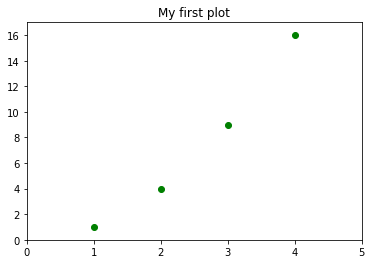

In [ ]:
# do some data visualizations
import matplotlib.pyplot as plt

plt.axis([0,5,0,17]) # specify the range values of axes X and Y
plt.title("My first plot")
plt.plot([1,2,3,4],[1,4,9,16],'go')  # b for blue, and o for dot

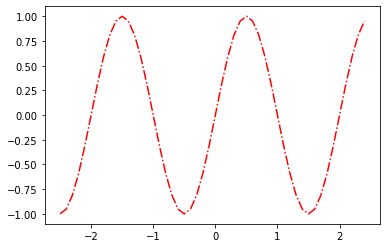

In [ ]:
import math
import numpy as np
t = np.arange(-2.5,2.5,0.1)

# the map() function applies the given function to each element of the list/object
y = map(math.sin, math.pi*t)  # map() returns iterator in Python 3

plt.plot(t, list(y), 'r-.') # need to cast y to list


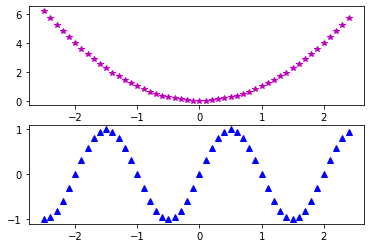

In [ ]:
# work with multiple figures using subplot()
def sqr(n):
    return n*n

r = map(sqr,t)
y = map(math.sin,math.pi*t)

# The argument of the subplot() function is composed of three integers.
# The first number defines how many parts the figure is split into vertically. 
# The second number defines how many parts the figure is divided into horizontally. 
# The third number selects which is the current subplot on which you can direct commands

plt.subplot(212)
plt.plot(t,list(y),'b^')
plt.subplot(211)
plt.plot(t,list(r),'m*')

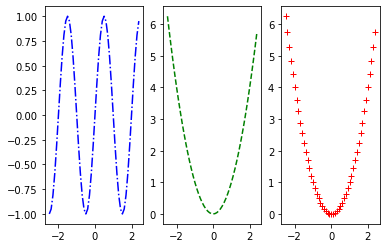

In [ ]:
# we can try to do subplotting in vetical subplots

r = map(sqr,t)
s = map(sqr,t)
y = map(math.sin,math.pi*t)

plt.subplot(131)
plt.plot(t,list(y),'b-.')
plt.subplot(132)
plt.plot(t,list(s),'g--')
plt.subplot(133)
plt.plot(t,list(r),'r+')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


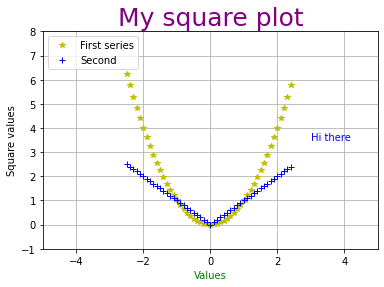

In [ ]:
# add some more elements to the plot

r = map(sqr,t)
plt.plot(t,list(r),'y*')
plt.title('My square plot', color='purple', fontsize=25)
plt.axis([-5,5,-1,8])
plt.xlabel('Values', color='green')
plt.ylabel('Square values')
# add some texts to the plot
plt.text(3,3.5,'Hi there', color='blue')
plt.grid(True)
s = map(math.fabs,t)
plt.plot(t,list(s),'b+')
plt.legend(['First series','Second'], loc=2)

# save your chart to the file
plt.savefig('/content/drive/MyDrive/mychart.png')

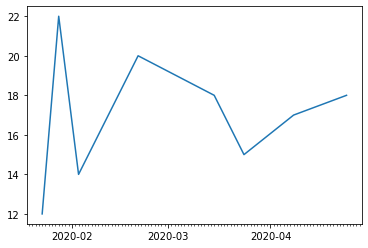

In [ ]:
# handle date and time properly

import datetime
import matplotlib.dates as mdates

months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%Y-%m')

events = [datetime.date(2020,1,23),datetime.date(2020,1,28),
          datetime.date(2020,2,3),datetime.date(2020,2,21),
          datetime.date(2020,3,15),datetime.date(2020,3,24),
          datetime.date(2020,4,8),datetime.date(2020,4,24)]
readings = [12,22,14,20,18,15,17,18]

fig, ax = plt.subplots()  # fig = plt.figure(); ax = fig.add_subplot(111)

plt.plot(events,readings)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)

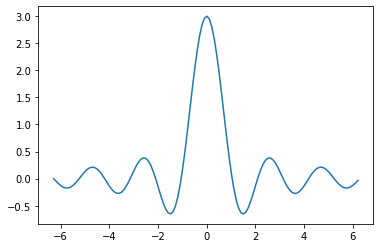

In [ ]:
# Knowing how to choose the type of chart to our data is a fundamental choice. 
# Remember that even an excellent data analysis represented incorrectly can lead 
# to a wrong interpretation of the experimental results

# line chart
x = np.arange(-2*np.pi,2*np.pi,0.1)
y = np.sin(3*x)/x
plt.plot(x,y)

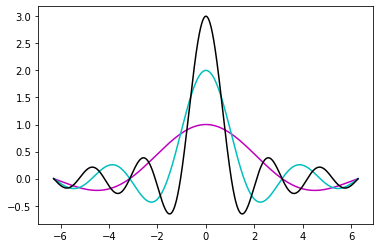

In [ ]:
x = np.arange(-2*np.pi,2*np.pi,0.01)
y = np.sin(x)/x
y2 = np.sin(2*x)/x
y3 = np.sin(3*x)/x
plt.plot(x,y, color='m')
plt.plot(x,y2, color='c')
plt.plot(x,y3, color='k')
# color codes are: r, g, b, c, m, y, k (black), w (white)

[ 0 35 28 70 42 53 31 13 77 24 74 72 27 61 93 24 21 27 96 38 48 10 52 55
 97 16 93 39 13 96  5 70 66  9 88 59 80  4 54 85 10 63 75 53 15 31 70 41
 55 72 14 31 69 85 75 81 59 51  6 76 14 98 35 52 23 46  0 90 79 41 65 50
 39 92 34 26 42 16 92 50 21 35  2 62  2 61 85 17 43  9 44 27  2 66 83 29
  5 95 13 49]
[6. 5. 7. 4. 5. 6. 4. 6. 6. 2. 8. 3. 6. 3. 6. 5. 4. 4. 5. 5.]


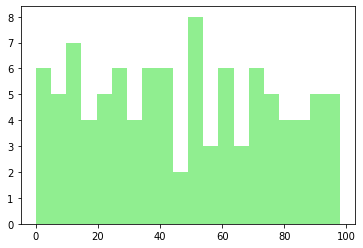

In [ ]:
# histogram

# np.random.seed(4)  # if you want to set a seed of the random number generator.

pop = np.random.randint(0,100,100)
print(pop)

n,bins,patches = plt.hist(pop,bins=20,color='lightgreen')
print(n)

<BarContainer object of 5 artists>

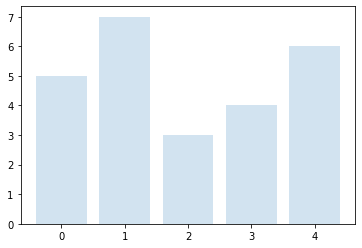

In [ ]:
# bar chart
index = [0,1,2,3,4]
values = [5,7,3,4,6]
plt.bar(index,values,alpha=0.2) # alpha is the transparency/opacity value

([<matplotlib.axis.XTick at 0x7ffa2d291990>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E')])

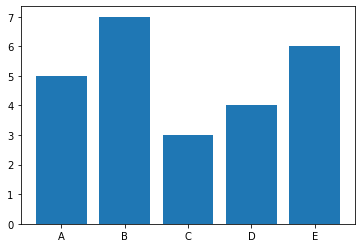

In [ ]:
# another bar chart
index = np.arange(5)
values1 = [5,7,3,4,6]
plt.bar(index,values1)
plt.xticks(index,['A','B','C','D','E'])  # labeling the ticks

([<matplotlib.axis.YTick at 0x7ffa2c147c10>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E')])

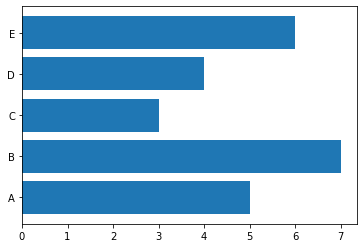

In [ ]:
# horizontal bar chart
index = np.arange(5)
values1 = [5,7,3,4,6]
plt.barh(index,values1)
plt.yticks(index,['A','B','C','D','E'])  # labeling the ticks

([<matplotlib.axis.XTick at 0x7ffa2bf21750>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E')])

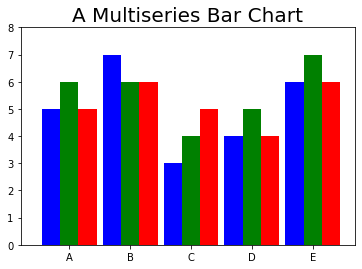

In [ ]:
# multiseries bar chart

index = np.arange(5)
index += 1
values1 = [5,7,3,4,6]
values2 = [6,6,4,5,7]
values3 = [5,6,5,4,6]
bw = 0.30  # the width of the bars
plt.axis([0.5,6,0,8])
plt.title('A Multiseries Bar Chart',fontsize=20)
plt.bar(index,values1,bw,color='b')
plt.bar(index+bw,values2,bw,color='g')
plt.bar(index+2*bw,values3,bw,color='r')
plt.xticks(index+bw,['A','B','C','D','E'])

([<matplotlib.axis.XTick at 0x7ffa2be22e50>,
 [Text(0, 0, 'Jan15'),
  Text(0, 0, 'Feb15'),
  Text(0, 0, 'Mar15'),
  Text(0, 0, 'Apr15')])

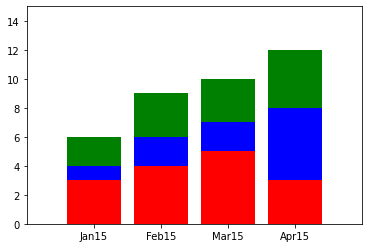

In [ ]:
# multiseries stacked bar chart

series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
index += 1

plt.axis([0,5,0,15])
plt.bar(index,series1,color='r')
plt.bar(index,series2,color='b',bottom=series1)  # add the bottom parameter
plt.bar(index,series3,color='g',bottom=(series2+series1))
plt.xticks(index,['Jan15','Feb15','Mar15','Apr15'])

([<matplotlib.axis.YTick at 0x7ffa2bdf6fd0>,
 [Text(0, 0, 'Jan15'),
  Text(0, 0, 'Feb15'),
  Text(0, 0, 'Mar15'),
  Text(0, 0, 'Apr15')])

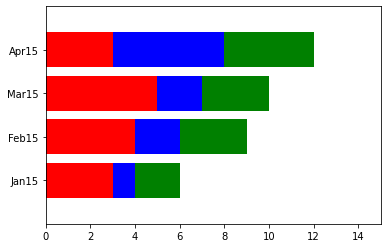

In [ ]:
# try the horizontal stacked bar chart
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
index += 1

plt.axis([0,15,0,5])
plt.barh(index,series1,color='r')
plt.barh(index,series2,color='b',left=series1)  # add the left parameter
plt.barh(index,series3,color='g',left=(series2+series1))
plt.yticks(index,['Jan15','Feb15','Mar15','Apr15'])


([<matplotlib.axis.YTick at 0x7ffa2b93fd50>,
 [Text(0, 0, 'Jan15'),
  Text(0, 0, 'Feb15'),
  Text(0, 0, 'Mar15'),
  Text(0, 0, 'Apr15')])

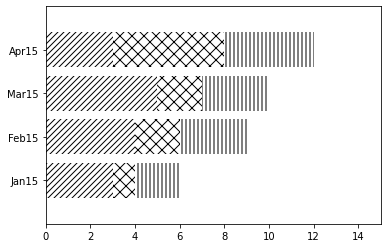

In [ ]:
# try to use hatches instead of colors
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
index += 1

plt.axis([0,15,0,5])
plt.barh(index,series1,color='w',hatch='////')  # set color to white first
plt.barh(index,series2,color='w',hatch='XX',left=series1)  # add the left parameter
plt.barh(index,series3,color='w',hatch='|||', left=(series2+series1))
plt.yticks(index,['Jan15','Feb15','Mar15','Apr15'])


([<matplotlib.patches.Wedge at 0x7ffa2b8e19d0>,
 [Text(0.6465637441936395, 0.8899187180267095, 'Huawei'),
  Text(-1.0461622061152445, 0.33991857627391475, 'Samsung'),
  Text(-0.49938938453783255, -0.9801072607683942, 'Apple'),
  Text(0.4993897515948555, -0.9801070737434909, 'Oppo'),
  Text(1.0461622458970796, -0.339918453837944, 'Vivo')])

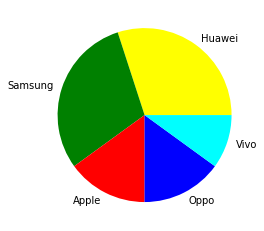

In [ ]:
# pie chart
labels = ['Huawei','Samsung','Apple','Oppo','Vivo']
values = [30,30,15,15,10]
colors = ['yellow','green','red','blue','cyan']
plt.pie(values,labels=labels,colors=colors)
# plt.axis('equal')

Text(0.5, 1.0, "Thailand's phone market")

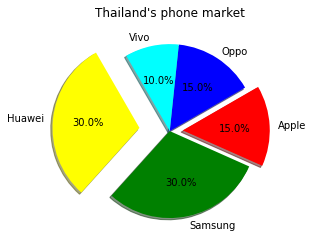

In [ ]:
# to explode some slices

labels = ['Huawei','Samsung','Apple','Oppo','Vivo']
values = [30,30,15,15,10]
colors = ['yellow','green','red','blue','cyan']
explode =  [0.35,0,0.15,0,0]   # values from 0 to 1, with higher value means moving out
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,
        autopct='%1.1f%%',startangle=120)  # start at the 120 degrees with the first slice
plt.title("Thailand's phone market")


In [ ]:
# Done!
print("Done.")

Done.
